The final grid size is  [20 20 20]
setting key: Al -> DATA/Al_lda.oe01.recpot
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -8.090977710718E+00     -8.090978E+00   7.877088E-01    1       1       2.235603E-02    
1       -8.273226052163E+00     -1.822483E-01   7.033208E-02    2       1       3.533530E-02    
2       -8.280858140828E+00     -7.632089E-03   4.803544E-03    7       1       6.104350E-02    
3       -8.281101062942E+00     -2.429221E-04   3.640534E-04    5       1       7.948804E-02    
4       -8.281135978865E+00     -3.491592E-05   3.590767E-05    6       1       1.001720E-01    
5       -8.281138625695E+00     -2.646830E-06   2.500997E-06    5       1       1.182144E-01    
6       -8.281138996214E+00     -3.705194E-07   4.573190E-08    8       1       1.450324E-01    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.3011519654661681
Chemical potential (eV)  : 8.194762384296814
Energy (a.u.) 

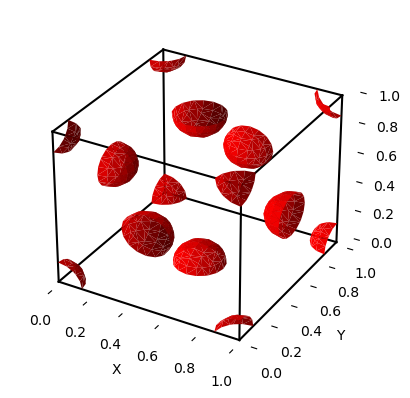

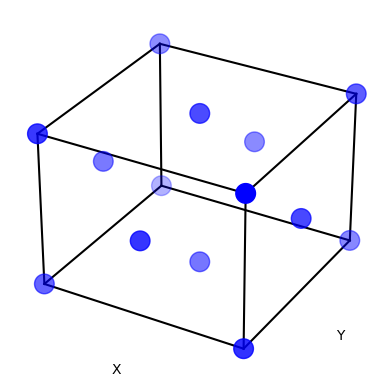

In [1]:
from dftpy.ions import Ions
from dftpy.field import DirectField
from dftpy.grid import DirectGrid
from dftpy.functional import LocalPseudo, Functional, TotalFunctional
from dftpy.formats import io
from dftpy.math_utils import ecut2nr
from dftpy.time_data import TimeData
from dftpy.optimization import Optimization
from dftpy.mpi import sprint

path_pp='DATA/'
file1='Al_lda.oe01.recpot'
PP_list = {'Al': path_pp+file1}

from ase.build import bulk
atoms = bulk('Al', 'fcc', a=4.05, cubic=True)
ions = Ions.from_ase(atoms)
# ions = io.read(posfile)

nr = ecut2nr(ecut=35, lattice=ions.cell)
grid = DirectGrid(lattice=ions.cell, nr=nr)
sprint('The final grid size is ', nr)

PSEUDO = LocalPseudo(grid = grid, ions=ions, PP_list=PP_list)

rho_ini = DirectField(grid=grid)
rho_ini[:] = ions.get_ncharges()/ions.cell.volume

KE = Functional(type='KEDF',name='TFvW')
XC = Functional(type='XC',name='LDA')
HARTREE = Functional(type='HARTREE')

evaluator = TotalFunctional(KE=KE, XC=XC, HARTREE=HARTREE, PSEUDO=PSEUDO)


optimization_options = {'econv' : 1e-6*ions.nat}
opt = Optimization(EnergyEvaluator=evaluator, optimization_options = optimization_options,
        optimization_method = 'TN')

rho = opt.optimize_rho(guess_rho=rho_ini)


energy = evaluator.Energy(rho=rho, ions=ions)
print('Energy (a.u.)', energy)

TimeData.output(lprint=True, sort='cost')

rho.write('rho.xsf', ions=ions)
rho.write('rho.cube', ions=ions)

import matplotlib.pyplot as plt
from dftpy.visualize import view
# %matplotlib widget
view(data=rho)
view(ions=ions)
# view(ions=ions, data=rho, viewer='vesta')
plt.show()